In [43]:
from qutip_qip import device, pulse, compiler, noise, circuit
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# frequencies are in GHz

n_levels = 3
a = destroy(n_levels)
H1 = a + a.dag()

t = np.linspace(0, 0.1, 101)
A = 100
μ = 0.05
Γ = 0.04
ω = 0.01 # GHz
φ = ω*μ

H1_coeffs = np.cos(ω*t-φ) * A*np.exp((-4*np.log(2)*((t-μ)**2))/(Γ**2))

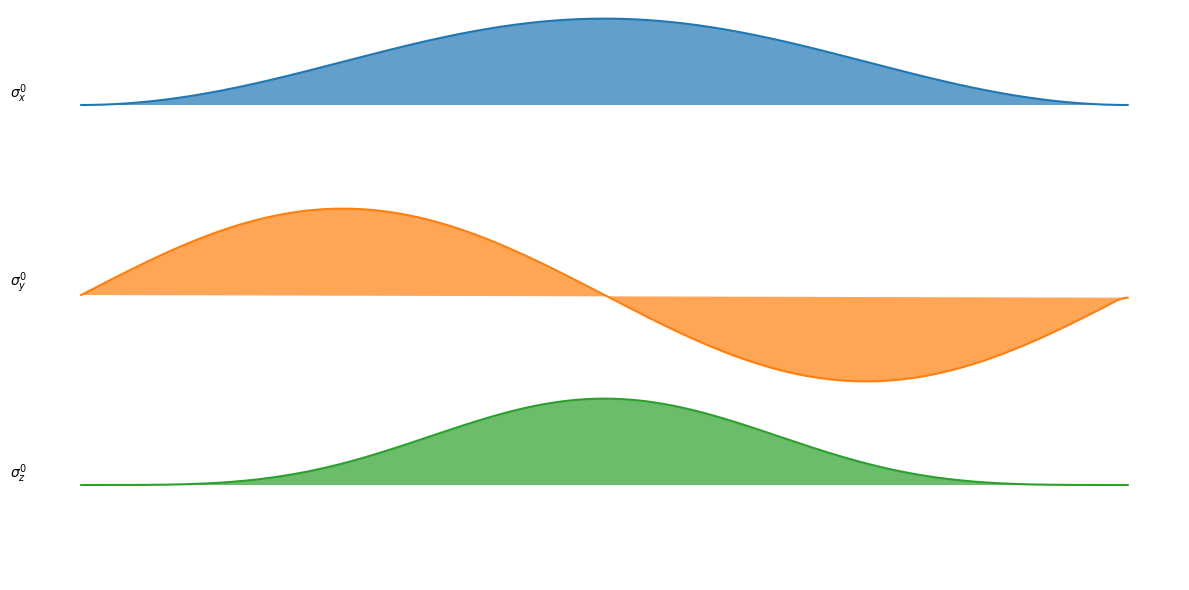

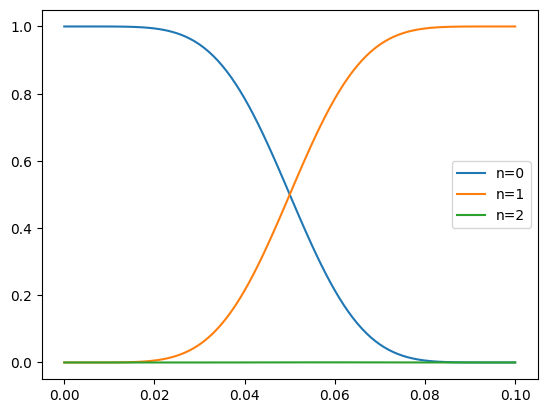

In [45]:
# circuit simulation

# define a NOT circuit
qc = circuit.QubitCircuit(1)
qc.add_gate("X", 0)

# define the processor
processor = device.SCQubits(1, dims=[n_levels], spline_kind="cubic", wq=[5], alpha=[-0.3], t1=None, t2=None)

# load the circuit and simulate
processor.load_circuit(qc)

# sets the time to 1000 steps between 0 and 0.1, instead of 101 values between 0 and 100
processor.set_tlist(t)

processor.plot_pulses()
plt.show()

result = processor.run_state(basis(3,0), e_ops = [basis(n_levels, i)*basis(n_levels, i).dag() for i in range(n_levels)])

[plt.plot(t, i) for i in result.expect]
plt.legend(["n="+str(i) for i in range(n_levels)])
plt.show()

In [58]:
# pulse level simulation

# define the processor
processor = device.SCQubits(1, dims=[n_levels], spline_kind="cubic")

processor.get_all_drift()

[(Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
  Qobj data =
  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.         -1.88495559]],
  [0])]

In [ ]:
p = pulse.Pulse(H1, 0, t, H1_coeffs, spline_kind="cubic")

processor.add_pulse(p)